In [7]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
import operator
import math

In [8]:
folder = 'ml-100k/'
m_cols = ['movie_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']
data= pd.read_csv(folder+'u.item',delimiter='|',names=m_cols,encoding='latin-1')
data.shape
np.random.seed(1002)


In [9]:
data.head()

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Childrens           1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [11]:
#number of unique movies
movies = data['movie_id'].unique().tolist()
num_items = len(movies)
num_items
movies

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [12]:
u_cols = ['user_id','age','gender','occupation','zip_code']
data_u = pd.read_csv(folder+'u.user',delimiter='|',names=u_cols,encoding='latin-1')
data_u.shape

(943, 5)

In [13]:
data_u.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
users = data_u['user_id'].unique().tolist()
num_users = len(users)
num_users

943

In [15]:
r_cols = ['user_id','movie_id','rating','timestamp']
data_r = pd.read_csv(folder+'u.data',delimiter='\t',names=r_cols,encoding='latin-1')
data_r.shape

(100000, 4)

In [16]:
data_r.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
num_ratings = data_r.shape[0]
num_ratings

100000

In [18]:
rec_matrix_size = num_users * num_items
sparsity = 1 - num_ratings / rec_matrix_size
sparsity

0.9369533063577546

In [19]:
movie_data_ratings_data=data.merge(data_r,on = 'movie_id',how = 'inner')
movie_data_ratings_data.head()
movie_data_ratings_data['user_id'] == None
movie_data_ratings_data[movie_data_ratings_data['movie_id'] == 242]
movie_data_ratings_data.shape

(100000, 27)

In [20]:
#displays high rated movies
high_rated= movie_data_ratings_data['rating']==5.0
movie_data_ratings_data[high_rated].head(10)

,movie_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,timestamp
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
8,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,95,5,879197329
10,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,189,5,893264174
22,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,340,5,884990988
32,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,43,5,875975579
37,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,38,5,892430636
39,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,96,5,884403574
41,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,157,5,874813703
48,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,18,5,880130802
51,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,45,5,881013176


In [21]:
genres = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
genres_count = {}
for genre in genres:
    count = 0
    genre_movies = movie_data_ratings_data[genre] == 1
    genres_count[genre] = movie_data_ratings_data[genre_movies].shape[0]

print(genres_count)
genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
print(genres_count_list)

{'unknown': 10, 'Action': 25589, 'Adventure': 13753, 'Animation': 3605, 'Childrens': 7182, 'Comedy': 29832, 'Crime': 8055, 'Documentary': 758, 'Drama': 39895, 'Fantasy': 1352, 'Film-Noir': 1733, 'Horror': 5317, 'Musical': 4954, 'Mystery': 5245, 'Romance': 19461, 'Sci-Fi': 12730, 'Thriller': 21872, 'War': 9398, 'Western': 1854}
[('Drama', 39895), ('Comedy', 29832), ('Action', 25589), ('Thriller', 21872), ('Romance', 19461), ('Adventure', 13753), ('Sci-Fi', 12730), ('War', 9398), ('Crime', 8055), ('Childrens', 7182), ('Horror', 5317), ('Mystery', 5245), ('Musical', 4954), ('Animation', 3605), ('Western', 1854), ('Film-Noir', 1733), ('Fantasy', 1352), ('Documentary', 758), ('unknown', 10)]


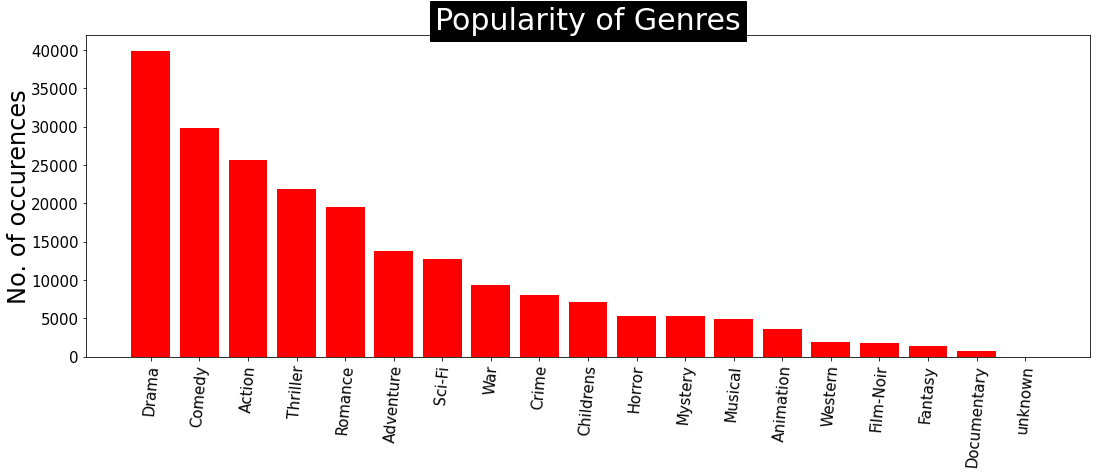

In [22]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in genres_count_list]
x_axis = [i for i in range(len(genres_count))]
x_label = [genre[0] for genre in genres_count_list]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

##### So far I used Dr. Asnat Messica  to to show ditribution of high ratings per genre, and to generae the merged DF of movies + ratings

so to be specific


# QUESTION 1

### Sparsity distribution of number of ratings 

In [23]:
sparsity = 1 - num_ratings / rec_matrix_size
sparsity

0.9369533063577546

In [24]:
ratings = range(1,6)
ratings_count = {}
for r in ratings:
    count = 0
    current_rating = movie_data_ratings_data['rating'] == r
    ratings_count[r] = movie_data_ratings_data[current_rating].shape[0]

print(ratings_count)
# genres_count_list = sorted(genres_count.items(), key=operator.itemgetter(1),reverse=True)
# print(genres_count_list)
ratings_count_list = sorted(ratings_count.items(), key=operator.itemgetter(1),reverse=True)
print(ratings_count_list)

{1: 6110, 2: 11370, 3: 27145, 4: 34174, 5: 21201}
[(4, 34174), (3, 27145), (5, 21201), (2, 11370), (1, 6110)]


### distribution of ratings

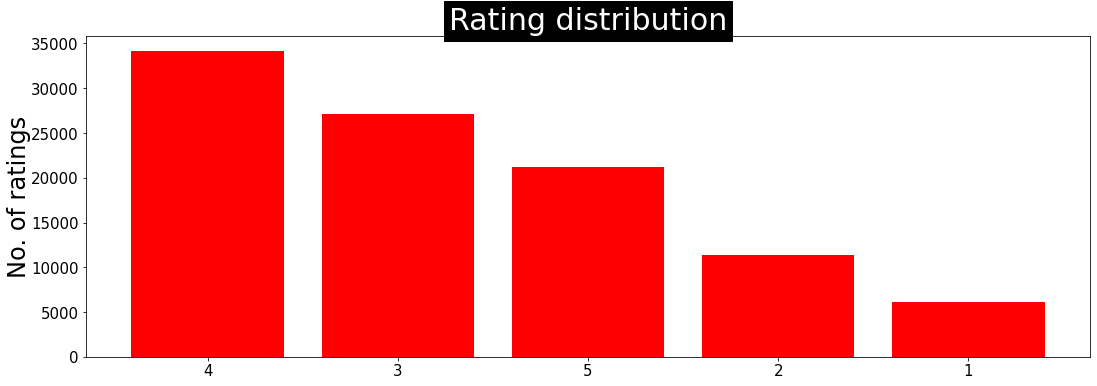

In [25]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genre[1] for genre in ratings_count_list]
x_axis = [i for i in range(len(ratings_count_list))]
x_label = [r[0] for r in ratings_count_list]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of ratings", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Rating distribution",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

### Average rating per user

In [26]:
users_avg_ratings =  movie_data_ratings_data.groupby('user_id')['rating'].mean().reset_index()
users_avg_ratings.sort_values(by=['rating'], ascending=False).head()

,user_id,rating
848,849,4.869565
687,688,4.833333
506,507,4.724138
627,628,4.703704
927,928,4.687500


### Average rating per movie for popularity 

In [745]:
users_avg_ratings =  movie_data_ratings_data.groupby(['movie title', 'movie_id'])['rating'].mean().reset_index()
users_avg_ratings.sort_values(by=['rating'], ascending=False).head(n=70)

,movie title,movie_id,rating
956,Marlene Dietrich: Shadow and Light (1996),1201,5.000000
30,Aiqing wansui (1994),1536,5.000000
1291,Santa with Muscles (1996),1500,5.000000
1489,They Made Me a Criminal (1939),1122,5.000000
641,"Great Day in Harlem, A (1994)",814,5.000000
...,...,...,...
1221,Raise the Red Lantern (1991),923,4.155172
226,Braveheart (1995),22,4.151515
1493,"Thin Man, The (1934)",493,4.150000
184,Blade Runner (1982),89,4.138182


In [202]:
def calculate_evaluate_single_user(predictions,R,user_id):
    rated_movies = []
    for j in range(num_movies):
        if (user_id,j) in R:
            rated_movies.append([j,R[(user_id,j)], predictions.loc[user_id,j]])
    
    if not rated_movies:
        return None
    sorted_prediction_movies = sorted(rated_movies, key = lambda x: x[2])
    sorted_prediction_movies.reverse()
    sorted_rated_movies = sorted(rated_movies, key = lambda x: x[1])
    sorted_rated_movies.reverse()
#     print(user_id)
#     print([[sorted_prediction_movies[i][1], sorted_rated_movies[i][1]] for i in range(len(sorted_prediction_movies))])
    MRR_5_len = min(5, len(rated_movies))
    MRR_10_len = min(10, len(rated_movies))
    MRR_5_rating = None
    MRR_10_rating = None
    DCG_5 = 0
    IDCG_5 = 0
    DCG_10 = 0
    IDCG_10 = 0
    for i in range(MRR_10_len): 
        if sorted_prediction_movies[i][1] >= 3 and i < MRR_5_len and MRR_5_rating is None:
            MRR_5_rating = 1 / (i + 1)
        if sorted_prediction_movies[i][1] >= 3 and MRR_10_rating is None:
            MRR_10_rating = 1 / (i + 1)
        
        if i < MRR_5_len:
            DCG_5 += sorted_prediction_movies[i][1] / math.log2(i + 2)
            IDCG_5 += sorted_rated_movies[i][1] / math.log2(i + 2)
        DCG_10 += sorted_prediction_movies[i][1] / math.log2(i + 2)
        IDCG_10 += sorted_rated_movies[i][1] / math.log2(i + 2)
    
    if MRR_5_rating is None:
        MRR_5_rating = 0
    if MRR_10_rating is None: 
        MRR_10_rating = 0
    return {'nDCG_10': DCG_10 / IDCG_10,'nDCG_5': DCG_5 / IDCG_5, 'MRR_5': MRR_5_rating, 'MRR_10': MRR_10_rating }
    



In [204]:
def evaluate_all_users(predictions,R):
    evaluations = {'nDCG_10': 0, 'nDCG_5': 0, 'MRR_5': 0,'MRR_10': 0}
    user_not_participated = 0
    for user_id in range(num_users):
        user_res = calculate_evaluate_single_user(predictions, R, user_id)
#         print(user_res)
        if user_res:
            evaluations['MRR_5'] += user_res['MRR_5']
            evaluations['MRR_10'] += user_res['MRR_10']        
            evaluations['nDCG_5'] += user_res['nDCG_5']
            evaluations['nDCG_10'] += user_res['nDCG_10']
        else: 
            user_not_participated+1
#     print
    num_of_users_participated = num_users - user_not_participated 
    for eval in evaluations.keys():
        evaluations[eval] = evaluations[eval] / num_of_users_participated
    return evaluations


{'nDCG_10': 0.5907365429554023,
 'nDCG_5': 0.5696906774304117,
 'MRR_5': 0.6508483563096501,
 'MRR_10': 0.6510250972074937}

### Average rating per movie

In [28]:
# users_avg_ratings =  movie_data_ratings_data.groupby(['movie title', 'movie_id'])['rating'].mean().reset_index()
users_avg_ratings =  movie_data_ratings_data.groupby(['movie title', 'movie_id'])['rating'].agg(['mean', 'count']).reset_index()
# indeices = users_avg_ratings.sort_values(by=['mean'], ascending=False)['count'] > 30
indices = users_avg_ratings['count'] > 100
popular_movies = users_avg_ratings[indices].sort_values(by=['mean'], ascending=False).head(n=20)['movie_id']
len(popular_movies)
# users_avg_ratings.sort_values(by=['rating'], ascending=False).head(n=20)

20

In [251]:
# For question 2
def results_to_average_training_results(results, folds):
    training_errors =[]
    for i in range(folds):
        training_errors.append([x[1] for x in results[i+1]['training_errors']])
    return [np.mean(k) for k in zip(*training_errors)]


In [249]:
ttt = {1: {'training_errors': [[0, 4], [1, 5], [2, 6],  [2, 99]]}, 2: {'training_errors': [[0, 1], [1, 1], [2, 1]]}}
results_to_training_results(ttt, 2)


[[4, 5, 6, 99], [1, 1, 1]]


[2.5, 3.0, 3.5]

# QUESTION 2

In [30]:
num_users = len(users)
num_movies = len(movies)

### QUESTION 2 - GD impl

In [31]:
def data_into_R(name):
    data= pd.read_csv(folder+name, delim_whitespace=True, header=None)
    R = {}
    for i in range(len(data)):
        R[(data.loc[i][0], data.loc[i][1])] = data.loc[i][2]
    return R

In [32]:
def calculate_rmse(U,V,R): 
    UV_T = U.dot(V.T)
    total = 0
    err = 0
    for i in range(num_users):
        for j in range(num_movies):
            t = (i, j)
            if t in R:
                total+=1
                err += (R[t] - UV_T.loc[i,j]) ** 2
    return math.sqrt(err / total)

In [895]:
def GD(alpha, K, lamnda_regularization, convergence_limit):
#     print('alpha: %f, K: %f, lamnda: %f' % (alpha, K, lamnda_regularization) )
    print('alpha: ' + str(alpha) + ' K: ' + str(K) + ' lambda: ' + str(lamnda_regularization))
    FOLD = 5
    results = {'alpha': alpha ,'lamnda_regularization': lamnda_regularization, 'K': K, 'convergence_limit': convergence_limit}
    fold_range = range(1, FOLD + 1)
    for fold in fold_range:
        U = pd.DataFrame(np.random.rand(num_users,K))
        V = pd.DataFrame(np.random.rand(num_movies,K))
        train_name = 'u%d.base' % (fold)
        test_name = 'u%d.test' % (fold)
        R = data_into_R(train_name)
        round = 0
        rmse_errors = []
        error_delta = 200
        previous_rmse = error_delta
        while error_delta > convergence_limit and round < 40:
            UV_T = U.dot(V.T)
            for i in range(1, num_users):
                for q in range(K):
                    err_user_component = 0
                    for j in range(1, num_movies):
                        if (i,j) in R:
                            e_ij = R[(i,j)] - UV_T.loc[i, j]
                            err_user_component += V.loc[j,q] * e_ij
                    U.loc[i,q] += alpha * (err_user_component - lamnda_regularization * U.loc[i,q])
#           I wasn't sure about this part, but it produced slightly better results if I adjusted 
#           the predictions before going to train the items vectors
            UV_T = U.dot(V.T)
            for movie_id in range(1, num_movies):
                for q in range(K): 
                    err_movie_component = 0
                    for user_id in range(1, num_users):
                        if (user_id,movie_id) in R:
                            e_ij = R[(user_id,movie_id)] - UV_T.loc[user_id, movie_id]
                            err_movie_component += U.loc[user_id,q] * e_ij
                    V.loc[movie_id, q] +=  alpha * (err_movie_component - lamnda_regularization * V.loc[movie_id, q])
            current_rmse = calculate_rmse(U,V, R)
            error_delta = abs(previous_rmse - current_rmse)
            previous_rmse = current_rmse
            rmse_errors.append([round, current_rmse])
            print('fold: %d round: %d RMSE %f, convergence error: %f'% (fold, round ,current_rmse, error_delta))
            round+=1
        R_test = data_into_R(test_name)
        rmse_test_result = calculate_rmse(U,V, R_test)
        print('fold: %d test RMSE %f'% (fold, rmse_test_result))
        predictions = UV_T = U.dot(V.T)
        evaluations = evaluate_all_users(predictions,R_test)
        results[fold] = {**evaluations,
                         **{'predictions': predictions, 'R_test': R_test, 'U': U, 'V': V}, 
                         **{'rmse_test_error': rmse_test_result, 
                            'training_errors': rmse_errors, 
                            'predictions': predictions}}
    rmse_test_error = 0
    nDCG_10_error = 0
    nDCG_5_error = 0
    MRR_5_error = 0
    MRR_10_error = 0
    for fold in fold_range:
        rmse_test_error += results[fold]['rmse_test_error']
        nDCG_10_error += results[fold]['nDCG_10']
        nDCG_5_error += results[fold]['nDCG_5']
        MRR_5_error += results[fold]['MRR_5']
        MRR_10_error += results[fold]['MRR_10']        
    results['rmse_test_error'] = rmse_test_error / FOLD
    results['nDCG_10'] = nDCG_10_error / FOLD
    results['nDCG_5'] = nDCG_5_error / FOLD
    results['MRR_5'] = MRR_5_error / FOLD
    results['MRR_10'] = MRR_10_error / FOLD    
    return results
            

### QUESTION 2 - ALS impl

In [437]:
def init_R2(name):
    data= pd.read_csv(folder+name, delim_whitespace=True, header=None)
    R = pd.DataFrame(np.zeros((num_users,num_movies)))   
    for i in range(len(data)):
        R.loc[data.loc[i][0], data.loc[i][1]] = data.loc[i][2]
    return R

In [860]:
def ALS(K, lamnda_regularization, convergence_limit):
    print('hi')
    FOLD = 5
    results = {'lamnda_regularization': lamnda_regularization, 'K': K, 'convergence_limit': convergence_limit}
    fold_range = range(1, FOLD + 1)
    print('K: %f lamnda: %f' % (K, lamnda_regularization))
    for fold in fold_range:
        U = pd.DataFrame(np.random.rand(num_users,K))
        V = pd.DataFrame(np.random.rand(num_movies,K))
        train_name = 'u%d.base' % (fold)
        test_name = 'u%d.test' % (fold)
        R = data_into_R(train_name)
        round = 0
        rmse_errors = []
        print('fold: %d' % fold )
        error_delta = 200
        previous_rmse = error_delta
        while error_delta > convergence_limit and round < 12:
            print('round: %d' % round )
            V_prepared = np.linalg.pinv(((V.T).dot(V) +  lamnda_regularization* np.identity(K)))
            for i in range(1, num_users):
#               Updating V_j component accoridng to the user rating
                V_j_compoenent = None
                for j in range(1, num_movies):
                        if (i,j) in R:
                            if V_j_compoenent is not None:
                                V_j_compoenent += R[(i,j)] * V.loc[j]
                            else:
                                V_j_compoenent = R[(i,j)] * V.loc[j]  
                if V_j_compoenent is not None:
                    U.loc[i] = V_j_compoenent.dot(V_prepared)
            U_prepared = np.linalg.pinv(((U.T).dot(U) +  lamnda_regularization* np.identity(K)))
            for movie_id in range(1, num_movies):
#               Updating U_j according to the user rating
                U_j_compoenent = None
                for user_id in range(1, num_users):
                        if (user_id,movie_id) in R:
                            if U_j_compoenent is not None:
                                U_j_compoenent += R[(user_id,movie_id)] * U.loc[user_id]                               
                            else:
                                U_j_compoenent = R[(user_id,movie_id)] * U.loc[user_id]                               

                if U_j_compoenent is not None:
                    V.loc[movie_id] = U_j_compoenent.dot(U_prepared)
            current_rmse = calculate_rmse(U,V, R)
            error_delta = abs(previous_rmse - current_rmse)
            previous_rmse = current_rmse
            rmse_errors.append([round, current_rmse])
            print('fold: %d round: %d RMSE %f'% (fold, round ,current_rmse))
            round+=1
        R_test = data_into_R(test_name)
        rmse_test_result = calculate_rmse(U,V, R_test)
        predictions = UV_T = U.dot(V.T)
        print('fold: %d test RMSE %f'% (fold, rmse_test_result))
        evaluations = evaluate_all_users(predictions,R_test)
        results[fold] = {**evaluations,
                         **{'predictions': predictions, 'R_test': R_test, 'U': U, 'V': V}, 
                         **{'rmse_test_error': rmse_test_result, 
                            'training_errors': rmse_errors, 
                            'predictions': predictions}}
    rmse_test_error = 0
    nDCG_10_error = 0
    nDCG_5_error = 0
    MRR_5_error = 0
    MRR_10_error = 0
    for fold in fold_range:
        rmse_test_error += results[fold]['rmse_test_error']
        nDCG_10_error += results[fold]['nDCG_10']
        nDCG_5_error += results[fold]['nDCG_5']
        MRR_5_error += results[fold]['MRR_5']
        MRR_10_error += results[fold]['MRR_10']        
    results['rmse_test_error'] = rmse_test_error / FOLD
    results['nDCG_10'] = nDCG_10_error / FOLD
    results['nDCG_5'] = nDCG_5_error / FOLD
    results['MRR_5'] = MRR_5_error / FOLD
    results['MRR_10'] = MRR_10_error / FOLD       
    return results
            

In [885]:
alphas = [0.0025]
lamnda_regularizations = [0.002]
Ks = [30, 20]


In [837]:
GDs = []

In [896]:
# GDs
for k in Ks:
    for re in lamnda_regularizations:
        for a in alphas:
            gd_result = GD(a, k, re, 0.00002)
            GDs.append(gd_result)
            line= {'alg': 'gradient descent', 
                   'lambda': re,
                   'K': k,
                   'alpha': a,
                   'rmse': gd_result['rmse_test_error'],
                    'nDCG_10': gd_result['nDCG_10'],
                   'MRR_10': gd_result['MRR_10'],
                  'nDCG_5': gd_result['nDCG_5'],
                  'MRR_5': gd_result['MRR_5'],
                  'convergence_limit': 0.02}
            print(line)
            summary_table = summary_table.append(line,ignore_index=True)
            summary_table.to_csv('temp_results_gd.csv')



alpha: 0.0001 K: 30 lambda: 0.002
fold: 1 round: 0 RMSE 3.527527, convergence error: 196.472473
fold: 1 round: 1 RMSE 3.015012, convergence error: 0.512515
fold: 1 round: 2 RMSE 2.661836, convergence error: 0.353176
fold: 1 round: 3 RMSE 2.406693, convergence error: 0.255143
fold: 1 round: 4 RMSE 2.215826, convergence error: 0.190867
fold: 1 round: 5 RMSE 2.069052, convergence error: 0.146774
fold: 1 round: 6 RMSE 1.953575, convergence error: 0.115477
fold: 1 round: 7 RMSE 1.860918, convergence error: 0.092657
fold: 1 round: 8 RMSE 1.785273, convergence error: 0.075644
fold: 1 round: 9 RMSE 1.722555, convergence error: 0.062718
fold: 1 round: 10 RMSE 1.669823, convergence error: 0.052732
fold: 1 round: 11 RMSE 1.624920, convergence error: 0.044903
fold: 1 round: 12 RMSE 1.586240, convergence error: 0.038681
fold: 1 round: 13 RMSE 1.552565, convergence error: 0.033674
fold: 1 round: 14 RMSE 1.522965, convergence error: 0.029600
fold: 1 round: 15 RMSE 1.496716, convergence error: 0.02624

fold: 4 round: 13 RMSE 1.552189, convergence error: 0.033657
fold: 4 round: 14 RMSE 1.522566, convergence error: 0.029623
fold: 4 round: 15 RMSE 1.496272, convergence error: 0.026294
fold: 4 round: 16 RMSE 1.472751, convergence error: 0.023521
fold: 4 round: 17 RMSE 1.451562, convergence error: 0.021189
fold: 4 round: 18 RMSE 1.432349, convergence error: 0.019213
fold: 4 round: 19 RMSE 1.414825, convergence error: 0.017524
fold: 4 round: 20 RMSE 1.398755, convergence error: 0.016071
fold: 4 round: 21 RMSE 1.383943, convergence error: 0.014812
fold: 4 round: 22 RMSE 1.370230, convergence error: 0.013713
fold: 4 round: 23 RMSE 1.357481, convergence error: 0.012749
fold: 4 round: 24 RMSE 1.345582, convergence error: 0.011899
fold: 4 round: 25 RMSE 1.334438, convergence error: 0.011144
fold: 4 round: 26 RMSE 1.323967, convergence error: 0.010471
fold: 4 round: 27 RMSE 1.314100, convergence error: 0.009867
fold: 4 round: 28 RMSE 1.304776, convergence error: 0.009324
fold: 4 round: 29 RMSE 1

fold: 2 round: 22 RMSE 1.153087, convergence error: 0.006845
fold: 2 round: 23 RMSE 1.146672, convergence error: 0.006415
fold: 2 round: 24 RMSE 1.140639, convergence error: 0.006032
fold: 2 round: 25 RMSE 1.134951, convergence error: 0.005688
fold: 2 round: 26 RMSE 1.129572, convergence error: 0.005378
fold: 2 round: 27 RMSE 1.124475, convergence error: 0.005098
fold: 2 round: 28 RMSE 1.119632, convergence error: 0.004843
fold: 2 round: 29 RMSE 1.115022, convergence error: 0.004610
fold: 2 round: 30 RMSE 1.110625, convergence error: 0.004397
fold: 2 round: 31 RMSE 1.106424, convergence error: 0.004201
fold: 2 round: 32 RMSE 1.102404, convergence error: 0.004020
fold: 2 round: 33 RMSE 1.098550, convergence error: 0.003854
fold: 2 round: 34 RMSE 1.094851, convergence error: 0.003699
fold: 2 round: 35 RMSE 1.091296, convergence error: 0.003555
fold: 2 round: 36 RMSE 1.087875, convergence error: 0.003421
fold: 2 round: 37 RMSE 1.084578, convergence error: 0.003296
fold: 2 round: 38 RMSE 1

fold: 5 round: 36 RMSE 1.086440, convergence error: 0.003267
fold: 5 round: 37 RMSE 1.083293, convergence error: 0.003146
fold: 5 round: 38 RMSE 1.080260, convergence error: 0.003034
fold: 5 round: 39 RMSE 1.077332, convergence error: 0.002928
fold: 5 test RMSE 1.131657
{'alg': 'gradient descent', 'lambda': 0.002, 'K': 20, 'alpha': 0.0001, 'rmse': 1.1223445034685755, 'nDCG_10': 0.7040924883959172, 'MRR_10': 0.7491279099126396, 'nDCG_5': 0.6774169886362447, 'MRR_5': 0.7488087663485332, 'convergence_limit': 0.02}


In [841]:
len(GDs)

12

In [858]:
ALs = []

[]

In [861]:
for k in Ks:
    for re in lamnda_regularizations:
        als_result = ALS(k, re, 0.02)
        r = {'alg': 'als', 
             'K': k,
             'lambda': re,
             'rmse': als_result['rmse_test_error'],
             'nDCG_10': als_result['nDCG_10'],
             'MRR_10': als_result['MRR_10'],
             'nDCG_5': als_result['nDCG_5'],
             'MRR_5': als_result['MRR_5'],
             'convergence_limit': 0.02
             }
        print(r)
        ALs.append(als_result)
        summary_table = summary_table.append(r,ignore_index=True)
        summary_table.to_csv('temp_results_als.csv')

hi
K: 20.000000 lamnda: 0.002000
fold: 1
round: 0
fold: 1 round: 0 RMSE 2.740530
round: 1
fold: 1 round: 1 RMSE 2.389503
round: 2
fold: 1 round: 2 RMSE 2.341665
round: 3
fold: 1 round: 3 RMSE 2.324399
fold: 1 test RMSE 2.912097
fold: 2
round: 0
fold: 2 round: 0 RMSE 2.735896
round: 1
fold: 2 round: 1 RMSE 2.404737
round: 2
fold: 2 round: 2 RMSE 2.360924
round: 3
fold: 2 round: 3 RMSE 2.345259
fold: 2 test RMSE 2.775907
fold: 3
round: 0
fold: 3 round: 0 RMSE 2.742260
round: 1
fold: 3 round: 1 RMSE 2.405022
round: 2
fold: 3 round: 2 RMSE 2.359201
round: 3
fold: 3 round: 3 RMSE 2.344901
fold: 3 test RMSE 2.728237
fold: 4
round: 0
fold: 4 round: 0 RMSE 2.716251
round: 1
fold: 4 round: 1 RMSE 2.404023
round: 2
fold: 4 round: 2 RMSE 2.363812
round: 3
fold: 4 round: 3 RMSE 2.346759
fold: 4 test RMSE 2.754378
fold: 5
round: 0
fold: 5 round: 0 RMSE 2.694495
round: 1
fold: 5 round: 1 RMSE 2.390147
round: 2
fold: 5 round: 2 RMSE 2.346153
round: 3
fold: 5 round: 3 RMSE 2.329849
fold: 5 test RMSE 2

## QUESTION 2 - Summary 

Bellow you may see the findings:
1. A table descriving all the alogirhtms, the parametesr and their results sorted by RMSE error 
2. Plot of the training erros of the different algorithms 
3. Answers to part 2 summary questions


<Figure size 432x288 with 0 Axes>

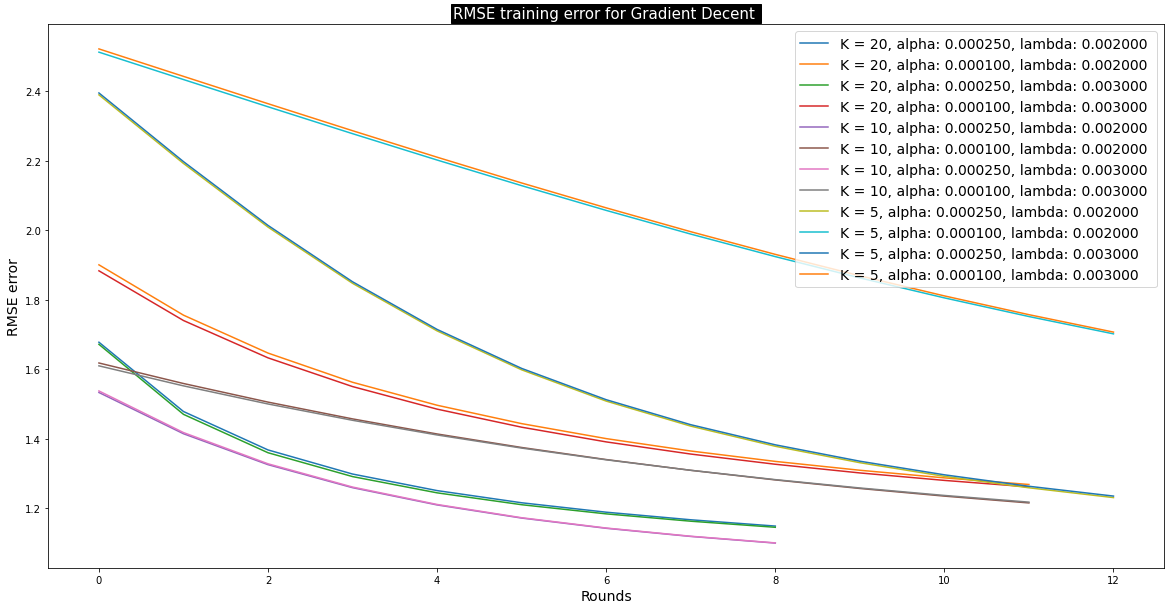

In [883]:

fig = plt.figure()
plt.figure(figsize=(20,10))
plt.title("RMSE training error for Gradient Decent ",bbox={'facecolor':'k', 'pad':2},color='w',fontsize = 15)
plt.xlabel("Rounds", fontsize=14)
plt.ylabel("RMSE error", fontsize=14)
for i in range(len(GDs)):   
    errors = results_to_average_training_results(GDs[i], 5)
    x = range(len(errors))
    y = errors
    label = 'K = %d, alpha: %f, lambda: %f ' % (GDs[i]['K'], GDs[i]['alpha'], GDs[i]['lamnda_regularization'])
    plt.errorbar(x,y , label=label)
    plt.legend(loc='upper right', prop={'size': 14})
    


The curves with the lowest RMSE are the ones with K = 10

<Figure size 432x288 with 0 Axes>

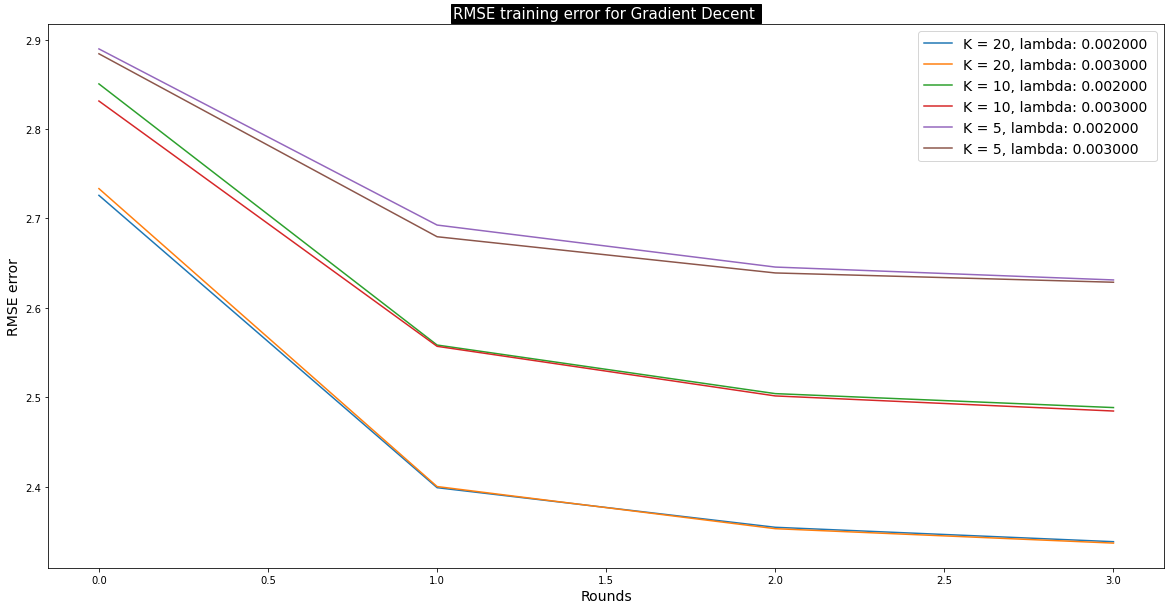

In [863]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.title("RMSE training error for Gradient Decent ",bbox={'facecolor':'k', 'pad':2},color='w',fontsize = 15)
plt.xlabel("Rounds", fontsize=14)
plt.ylabel("RMSE error", fontsize=14)
for i in range(len(ALs)):   
    errors = results_to_average_training_results(ALs[i], 5)
    x = range(len(errors))
    y = errors
    label = 'K = %d, lambda: %f ' % (ALs[i]['K'], ALs[i]['lamnda_regularization'])
    plt.errorbar(x,y , label=label)
    plt.legend(loc='upper right', prop={'size': 14})
    

In [890]:
GD_results = pd.read_csv("temp_results.csv") 
GD_results
SLA_results = pd.read_csv("temp_results_als.csv")
all_results = pd.concat([GD_results, SLA_results])
all_results.sort_values(by=['rmse'], ascending=True).head(n=10)

,Unnamed: 0,alg,K,lambda,alpha,rmse,nDCG_10,MRR_10,nDCG_5,MRR_5,convergence_limit
4,4,gradient descent,10,0.002,0.00025,1.126680,0.724240,0.774751,0.704996,0.774645,0.02
6,6,gradient descent,10,0.003,0.00025,1.130616,0.723885,0.773595,0.704352,0.773507,0.02
2,2,gradient descent,20,0.003,0.00025,1.188728,0.694868,0.736569,0.665895,0.736306,0.02
0,0,gradient descent,20,0.002,0.00025,1.197195,0.693815,0.740561,0.665160,0.740371,0.02
5,5,gradient descent,10,0.002,0.00010,1.245731,0.713787,0.767035,0.691718,0.766939,0.02
7,7,gradient descent,10,0.003,0.00010,1.246800,0.714323,0.765311,0.692943,0.765122,0.02
10,10,gradient descent,5,0.003,0.00025,1.294713,0.728947,0.775210,0.710633,0.775210,0.02
8,8,gradient descent,5,0.002,0.00025,1.296995,0.728840,0.775129,0.710460,0.775094,0.02
3,3,gradient descent,20,0.003,0.00010,1.311487,0.685515,0.732259,0.655059,0.731987,0.02
1,1,gradient descent,20,0.002,0.00010,1.320229,0.684531,0.731435,0.652750,0.730901,0.02


### Question 2 summary

In this section I implemneted both ALS and gradient descent algorithms for matrix factorization.
I did not manage to complete on time popularity and bias algorithms since I did this excersice by myself :\
I think my results were not bad in terms of RMSE, at lesat not when I compared them in the internet and in class. 
I was expecting that the best results. for GD will become better as K when larger. Maybe with bigger K it would eventually get better, but it also runs for way to much time on my computer. 

One of the challenges I excperienced were to find the correct parameters for alpha and regularization . 
Initially no matter what I did the erros kepts on diverging to infinity, even after I fixed all my bugs. 
Then it became a fine experiment to find out the right learning rate vs. convergences to local maximums . 

I seems that the best parameters for other evaluations did not necessarily come from the same one as RMSE, but rather K=20 won this time

In [892]:
all_results.sort_values(by=['nDCG_10'], ascending=True).head(n=3)

,Unnamed: 0,alg,K,lambda,alpha,rmse,nDCG_10,MRR_10,nDCG_5,MRR_5,convergence_limit
1,1,gradient descent,20,0.002,0.00010,1.320229,0.684531,0.731435,0.652750,0.730901,0.02
3,3,gradient descent,20,0.003,0.00010,1.311487,0.685515,0.732259,0.655059,0.731987,0.02
0,0,gradient descent,20,0.002,0.00025,1.197195,0.693815,0.740561,0.665160,0.740371,0.02


In [893]:
all_results.sort_values(by=['MRR_10'], ascending=True).head(n=3)

,Unnamed: 0,alg,K,lambda,alpha,rmse,nDCG_10,MRR_10,nDCG_5,MRR_5,convergence_limit
1,1,gradient descent,20,0.002,0.00010,1.320229,0.684531,0.731435,0.652750,0.730901,0.02
3,3,gradient descent,20,0.003,0.00010,1.311487,0.685515,0.732259,0.655059,0.731987,0.02
2,2,gradient descent,20,0.003,0.00025,1.188728,0.694868,0.736569,0.665895,0.736306,0.02


It also seems that my implementation of ALS made the algorithm lose in all evaliuations compared with GD (and by a lot - almost X2 errors) 


In [894]:
all_results.sort_values(by=['nDCG_10'], ascending=False).head(n=3)

,Unnamed: 0,alg,K,lambda,alpha,rmse,nDCG_10,MRR_10,nDCG_5,MRR_5,convergence_limit
3,3,als,10,0.003,NaN,2.783291,0.732007,0.780758,0.713723,0.780710,0.02
2,2,als,10,0.002,NaN,2.787933,0.731998,0.781634,0.713578,0.781559,0.02
1,1,als,20,0.003,NaN,2.797412,0.731246,0.782422,0.713277,0.782333,0.02


### General impression
As expected I noticed that as K grows the results are getting better and bettter (with the evaluations that are not RMSE). 
This happens because ech item and user can be descirbe with more parameters, and thus we gain a braoder way to describe each user and item, and the relationship between them as we will see in question 3. 
The problem is that as K grows it takes more CPU time to finish each training round. The number of parametres that we are required to learn (leaving aside the bias) is $K\cdot n + K \cdot m$, so the relationhip between the number of parametesrs we are required to learn and K is linear, which is not bad, but still quite a lot for my personal laptop. For the next assignment ill get a google collab machine :) 

### Evaluation analysis


### Question 3.A

Next lets try to rationalize the results and understand them better. 
In each of the calculations above I've saved the predictions, latent users matrix, latent items matrix. 
According to the summary table we can see that the most dominent parametrer is the latent parameter (K).
I'll choose a run of the gradient descent alg with K=20. I will calculate the cosine different beween each items and look into the 5 closest pairs in the latent matrix V similiarty as:
Then I will show that the chosen movies are indeed close in genre according to the genre annotaion that the data supplied.
In class Asi defined $adjustedCosine$ similiarty, while scipy.spatial is supplying $1 - scipy.spatial$, so I will sort the values in an acesnding order and find the pairs

An intreseting observation is that the results in ALS, even though their RMSE wasnt not as good as good, given their latent V matrix produce a much better similarity when I observed the item to item closeness. 
This might happen because the U and V are studied separetly during the process of ALS, unlike GD when in each cycle the change in U results in change in V. 
In addition, not all movies I deemed similar were annoteated with similar genres, a lot of times some genres were interchangeable: 
1. drama and romance
2. Thriller and sci-fi
3. Thriller and crime
4. Mystery and Fantasy 

I noticed that most of the movies that I marked close, were also in close range of time, this fits the hypothsis that 

A lot of the movies in the list I don't know, I order to verify this with domain knowledge of mine. I took some of the popular movies, and went and found the closestn movies to them in V matrix
movie_id 50
movie title Star Wars (1977)

the closest movie to it in V was another star wars movie:
movie id: 181
title: Return of the Jedi (1983)

which is not a great suprise.

Another comparison I made is with titanic:
here are the 4 closest movies according to my latex V matrix:
Tomorrow Never Die
Good Will Hunting  
Air Force One
The Devil's Advocate 

All are global drama / thriller block busters that were published within a year from Titanic and have similar vibes. Personally I like titanic and wouldn't mind watching any of those. 


Another comparison I made is with braveheart.
All closest movies were within the same year as well. And also, head the same action vibe with a single hero leader: 
Dances with Wolves
the fugitive
Raiders of the Lost Ark
The Terminator


Then, I decided to see what happens with  'The Terminator', which other than being a block buster is also more specific futureistic +  action + thriller movie with a lot of killing in it. here are the movies that came up : 

Blade Runner
Terminator 2: Judgment Day 
Empire Strikes Back
Aliens (1986)
Aliens (1979)
The Hunt for Red October ( which I did not know)


And the ALIENTS came up, which is not only an amazing movie, but very very bloody, and so many people would not love it. 
Unlike good will hunting or titanic that have a very very diverse crowed who also loves other popular movies, I suspected correctly that Aliens would be closely attached with movies that are very much alien bloody like:

Blade Runner (1982)
Terminator 2: Judgment Day (1991)
Silence of the Lambs, The (1991)
Abyss, The (1989)
Alien (1979)
Terminator, The (1984)
Jaws (1975)
American Werewolf in London, An (1981)
Conan the Barbarian (1981)

Another last one Silence of the Lambs, The (1991), brouth up 

Pulp Fiction (1994)
Fugitive, The (1993)
Abyss, The (1989)
Aliens (1986)
Alien (1979)
Psycho (1960)
Shining, The (1980)
Unforgiven (1992)
Jaws (1975)
Death and the Maiden (1994)


For conclusion, I started up with the poplar movies, but I realized that since their crowed is very diverse I found movies that might have similar vibes, but not nesecceraly in the same genre.
When I went to other popular movies but narrower in the sense of  horror/ bloody the brought up a cluster of movies that are distinctly from the same genre 


In [698]:
from scipy.spatial import distance
from numpy import linalg as LA

distances = distance.cdist(ALs[0][1]['V'], ALs[0][1]['V'], 'cosine')
# Making sure I am not considering an item with itself 
for i in range(distances.shape[0]):
    distances[i,i] = 2


# Giving a movie id I find the 10 closest movies to it by ALS
    
current_movie_id = 98
closest_to_titanic = sorted(distances[current_movie_id,:])[:10]
closest_ids = []
for i in range(len(distances[current_movie_id,:])):
    if  distances[current_movie_id,i] in closest_to_titanic:

        closest_ids.append(i)

print(closest_ids)
print (data.loc[current_movie_id -1])
for id in closest_ids:
    print(data.loc[id - 1]['movie title'])



[56, 79, 164, 176, 183, 185, 200, 203, 234, 1109]
movie_id                                                             98
movie title                            Silence of the Lambs, The (1991)
release date                                                01-Jan-1991
video release date                                                  NaN
IMDb URL              http://us.imdb.com/M/title-exact?Silence%20of%...
unknown                                                               0
Action                                                                0
Adventure                                                             0
Animation                                                             0
Childrens                                                             0
Comedy                                                                0
Crime                                                                 0
Documentary                                                           0
Drama         

### Question 3.B

I chose to look into K = 20.
In order to find out what the latent dimensions describes, I took movies that are far apart and tried check which of the latent matrix attributes are with high values  + very different. 
I looked into 'Clockwork Orange', as sort of an extremely cringe movie and some drama boring movie and noticed that the 3rd indice was much higher than everything else, so I filtered out all movies with high values in that dimension and got a list of some distrubting movies.
Usual Suspects, The (1995)
Taxi Driver (1976)
Ed Wood (1994)
Clockwork Orange, A (1971)
Cape Fear (1991)
Scream (1996)
Heathers (1989)
Trainspotting (1996)
Almost all these movies are annotated with Thriller / crime / Horror

##### The cool thing was, that even google made similar suggestions when I looked in the titles of some of the movies. 

The second latent that I looked into were animation movies. 
I couldn't find a single attribute that filtered out very narrowly the annimations, but when I used 2 dimensions I did find that they characterised pretty well popular annimations for kids. 
I did it by first filtering out animations, and looking into the attributes that are closest, then found a very very specific range where I had mostly some animation movies , but some movies that I had no explanation as to why there are there:
Toy Story (1995)
Lion King, The (1994)
Aladdin (1992)
Aladdin and the King of Thieves

unrelated movies that I hit:
While You Were Sleeping (1995)
Natural Born Killers

One of the realizations I had while observing at the results of question 3 is that while there is an annotation to the movies genres, the way I learnt the data has nothing to do with the annotations, it was simply done by trying to learn the correct predictions. 

In [763]:
candidates = []
for row in range(1681):
    if ALs[0][1]['V'].loc[row][3] > 4:
        candidates.append(row)

for j in candidates:
    print(data.loc[j -1])


movie_id                                                             12
movie title                                  Usual Suspects, The (1995)
release date                                                14-Aug-1995
video release date                                                  NaN
IMDb URL              http://us.imdb.com/M/title-exact?Usual%20Suspe...
unknown                                                               0
Action                                                                0
Adventure                                                             0
Animation                                                             0
Childrens                                                             0
Comedy                                                                0
Crime                                                                 1
Documentary                                                           0
Drama                                                           

In [835]:

candidates = []
for row in range(1681):
    if ALs[0][1]['V'].loc[row][9] < -1.37 and  ALs[0][1]['V'].loc[row][9] > -1.59:
        candidates.append(row)

data[data['movie_id'].isin(candidates)]['movie title']


